# Sierpinski Triangle Fractal

## Introduction

The **Sierpinski Triangle** (also called the Sierpinski Gasket or Sierpinski Sieve) is one of the most famous fractal structures in mathematics. Named after Polish mathematician Wacław Sierpiński who described it in 1915, this fractal exhibits remarkable self-similarity properties and serves as an excellent introduction to fractal geometry.

## Mathematical Definition

### Recursive Construction

The Sierpinski Triangle can be constructed recursively as follows:

1. Start with an equilateral triangle
2. Subdivide it into four smaller congruent equilateral triangles
3. Remove the central triangle
4. Repeat steps 2-3 for each remaining triangle

### Fractal Dimension

The fractal (Hausdorff) dimension of the Sierpinski Triangle is given by:

$$D = \frac{\log(N)}{\log(s)}$$

where $N$ is the number of self-similar pieces and $s$ is the scaling factor.

For the Sierpinski Triangle:
- $N = 3$ (three triangles remain after each iteration)
- $s = 2$ (each triangle is scaled by factor of 2)

Therefore:

$$D = \frac{\log(3)}{\log(2)} \approx 1.585$$

This non-integer dimension confirms the fractal nature of the structure.

### Area and Perimeter

After $n$ iterations, if the original triangle has area $A_0$:

$$A_n = A_0 \left(\frac{3}{4}\right)^n$$

As $n \to \infty$, the area approaches zero:

$$\lim_{n \to \infty} A_n = 0$$

Conversely, the perimeter after $n$ iterations grows as:

$$P_n = P_0 \left(\frac{3}{2}\right)^n$$

Thus the perimeter tends to infinity while the area vanishes.

## The Chaos Game Method

An elegant probabilistic approach to generating the Sierpinski Triangle is the **Chaos Game**:

1. Define three vertices of an equilateral triangle: $V_1$, $V_2$, $V_3$
2. Start with an arbitrary point $P_0$ inside the triangle
3. Randomly select one of the three vertices
4. Move halfway from the current point toward the selected vertex:
   $$P_{n+1} = \frac{P_n + V_i}{2}$$
5. Plot the new point and repeat

Remarkably, after many iterations, the plotted points converge to the Sierpinski Triangle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Set random seed for reproducibility
np.random.seed(42)

## Method 1: Recursive Geometric Construction

We implement the deterministic recursive algorithm that removes central triangles at each iteration level.

In [2]:
def sierpinski_recursive(vertices, depth):
    """
    Recursively generate Sierpinski triangle coordinates.
    
    Parameters:
    -----------
    vertices : array-like
        Three vertices of the current triangle [(x1,y1), (x2,y2), (x3,y3)]
    depth : int
        Recursion depth (number of iterations)
    
    Returns:
    --------
    list : List of triangles (each triangle is array of 3 vertices)
    """
    if depth == 0:
        return [vertices]
    
    # Calculate midpoints of each edge
    v0, v1, v2 = vertices
    mid01 = (v0 + v1) / 2
    mid12 = (v1 + v2) / 2
    mid02 = (v0 + v2) / 2
    
    # Recursively generate three corner triangles (excluding center)
    triangles = []
    triangles.extend(sierpinski_recursive(np.array([v0, mid01, mid02]), depth - 1))
    triangles.extend(sierpinski_recursive(np.array([mid01, v1, mid12]), depth - 1))
    triangles.extend(sierpinski_recursive(np.array([mid02, mid12, v2]), depth - 1))
    
    return triangles

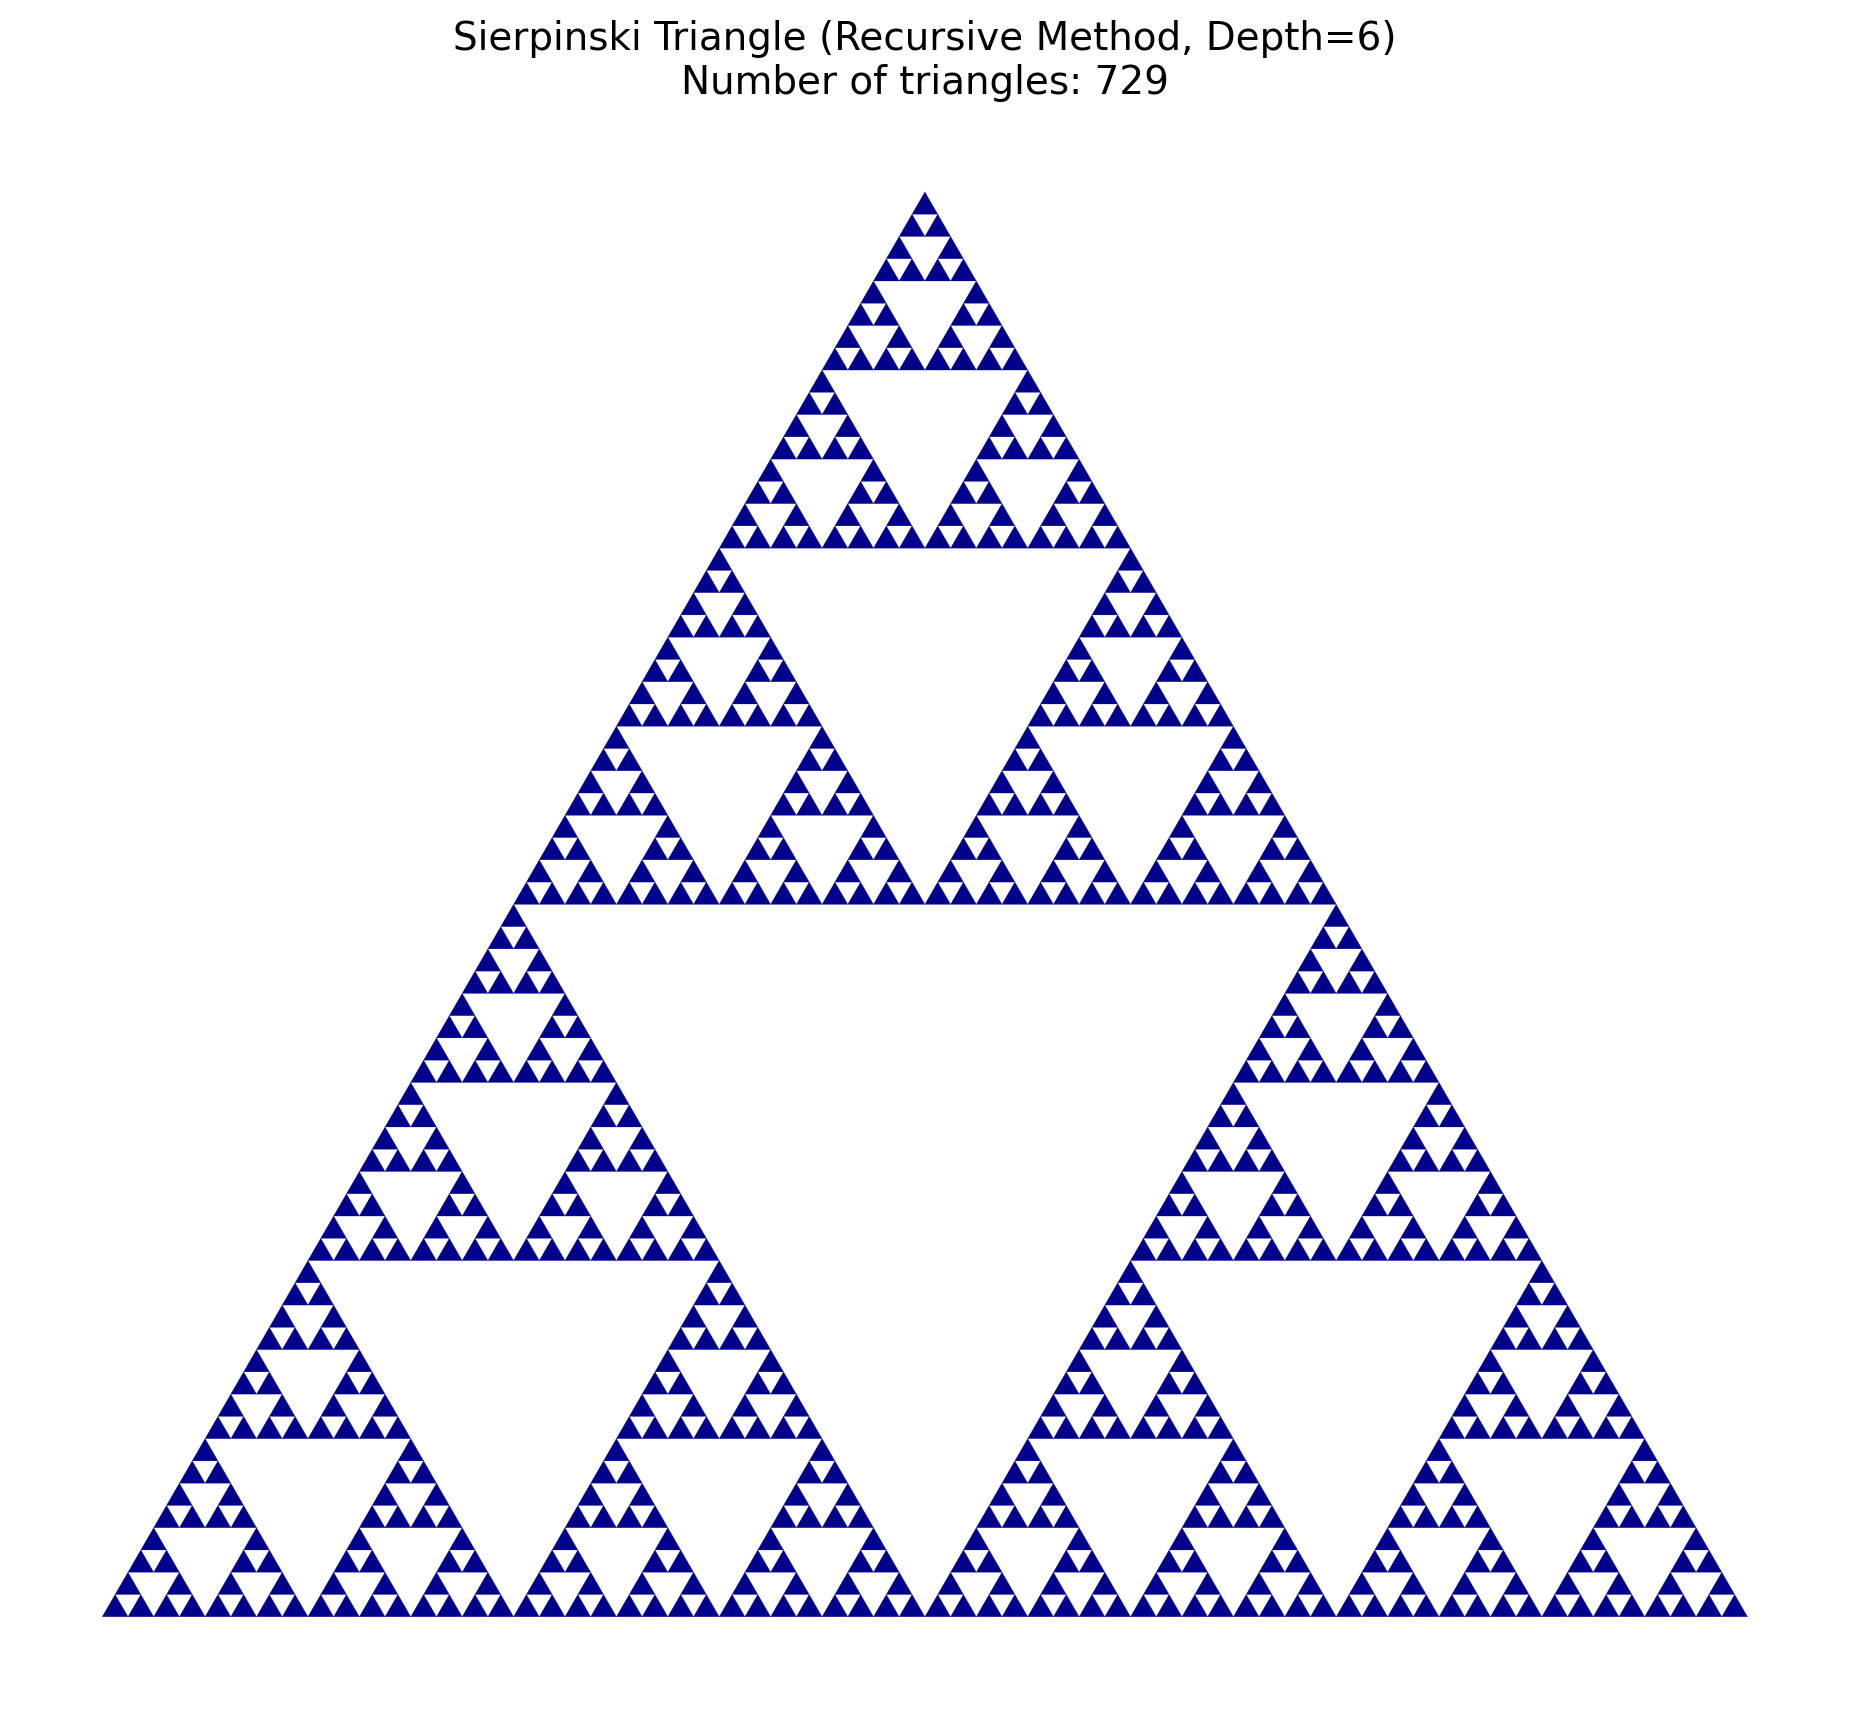

In [3]:
def plot_sierpinski_recursive(depth=6):
    """
    Plot Sierpinski triangle using recursive method.
    
    Parameters:
    -----------
    depth : int
        Number of recursive iterations
    """
    # Define initial equilateral triangle vertices
    height = np.sqrt(3) / 2
    initial_vertices = np.array([
        [0, 0],
        [1, 0],
        [0.5, height]
    ])
    
    # Generate all triangles
    triangles = sierpinski_recursive(initial_vertices, depth)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(10, 8.7))
    
    # Create polygon patches
    patches = [Polygon(tri, closed=True) for tri in triangles]
    collection = PatchCollection(patches, facecolor='darkblue', 
                                  edgecolor='darkblue', linewidth=0.1)
    ax.add_collection(collection)
    
    # Formatting
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, height + 0.05)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Sierpinski Triangle (Recursive Method, Depth={depth})\n'
                 f'Number of triangles: {3**depth}', fontsize=14)
    
    return fig, ax

# Generate recursive Sierpinski triangle
fig_recursive, ax_recursive = plot_sierpinski_recursive(depth=6)
plt.tight_layout()
plt.show()

## Method 2: Chaos Game (Stochastic Approach)

The Chaos Game demonstrates how deterministic fractal structure emerges from random processes. This is a beautiful example of order arising from chaos.

In [4]:
def chaos_game_sierpinski(n_points=50000):
    """
    Generate Sierpinski triangle using the Chaos Game algorithm.
    
    Parameters:
    -----------
    n_points : int
        Number of points to generate
    
    Returns:
    --------
    points : ndarray
        Array of (x, y) coordinates
    """
    # Define vertices of equilateral triangle
    height = np.sqrt(3) / 2
    vertices = np.array([
        [0, 0],
        [1, 0],
        [0.5, height]
    ])
    
    # Initialize starting point (center of triangle)
    point = np.array([0.5, height / 3])
    
    # Store all points
    points = np.zeros((n_points, 2))
    
    # Chaos game iteration
    for i in range(n_points):
        # Randomly select a vertex
        vertex_idx = np.random.randint(0, 3)
        
        # Move halfway toward selected vertex
        point = (point + vertices[vertex_idx]) / 2
        
        # Store point
        points[i] = point
    
    return points

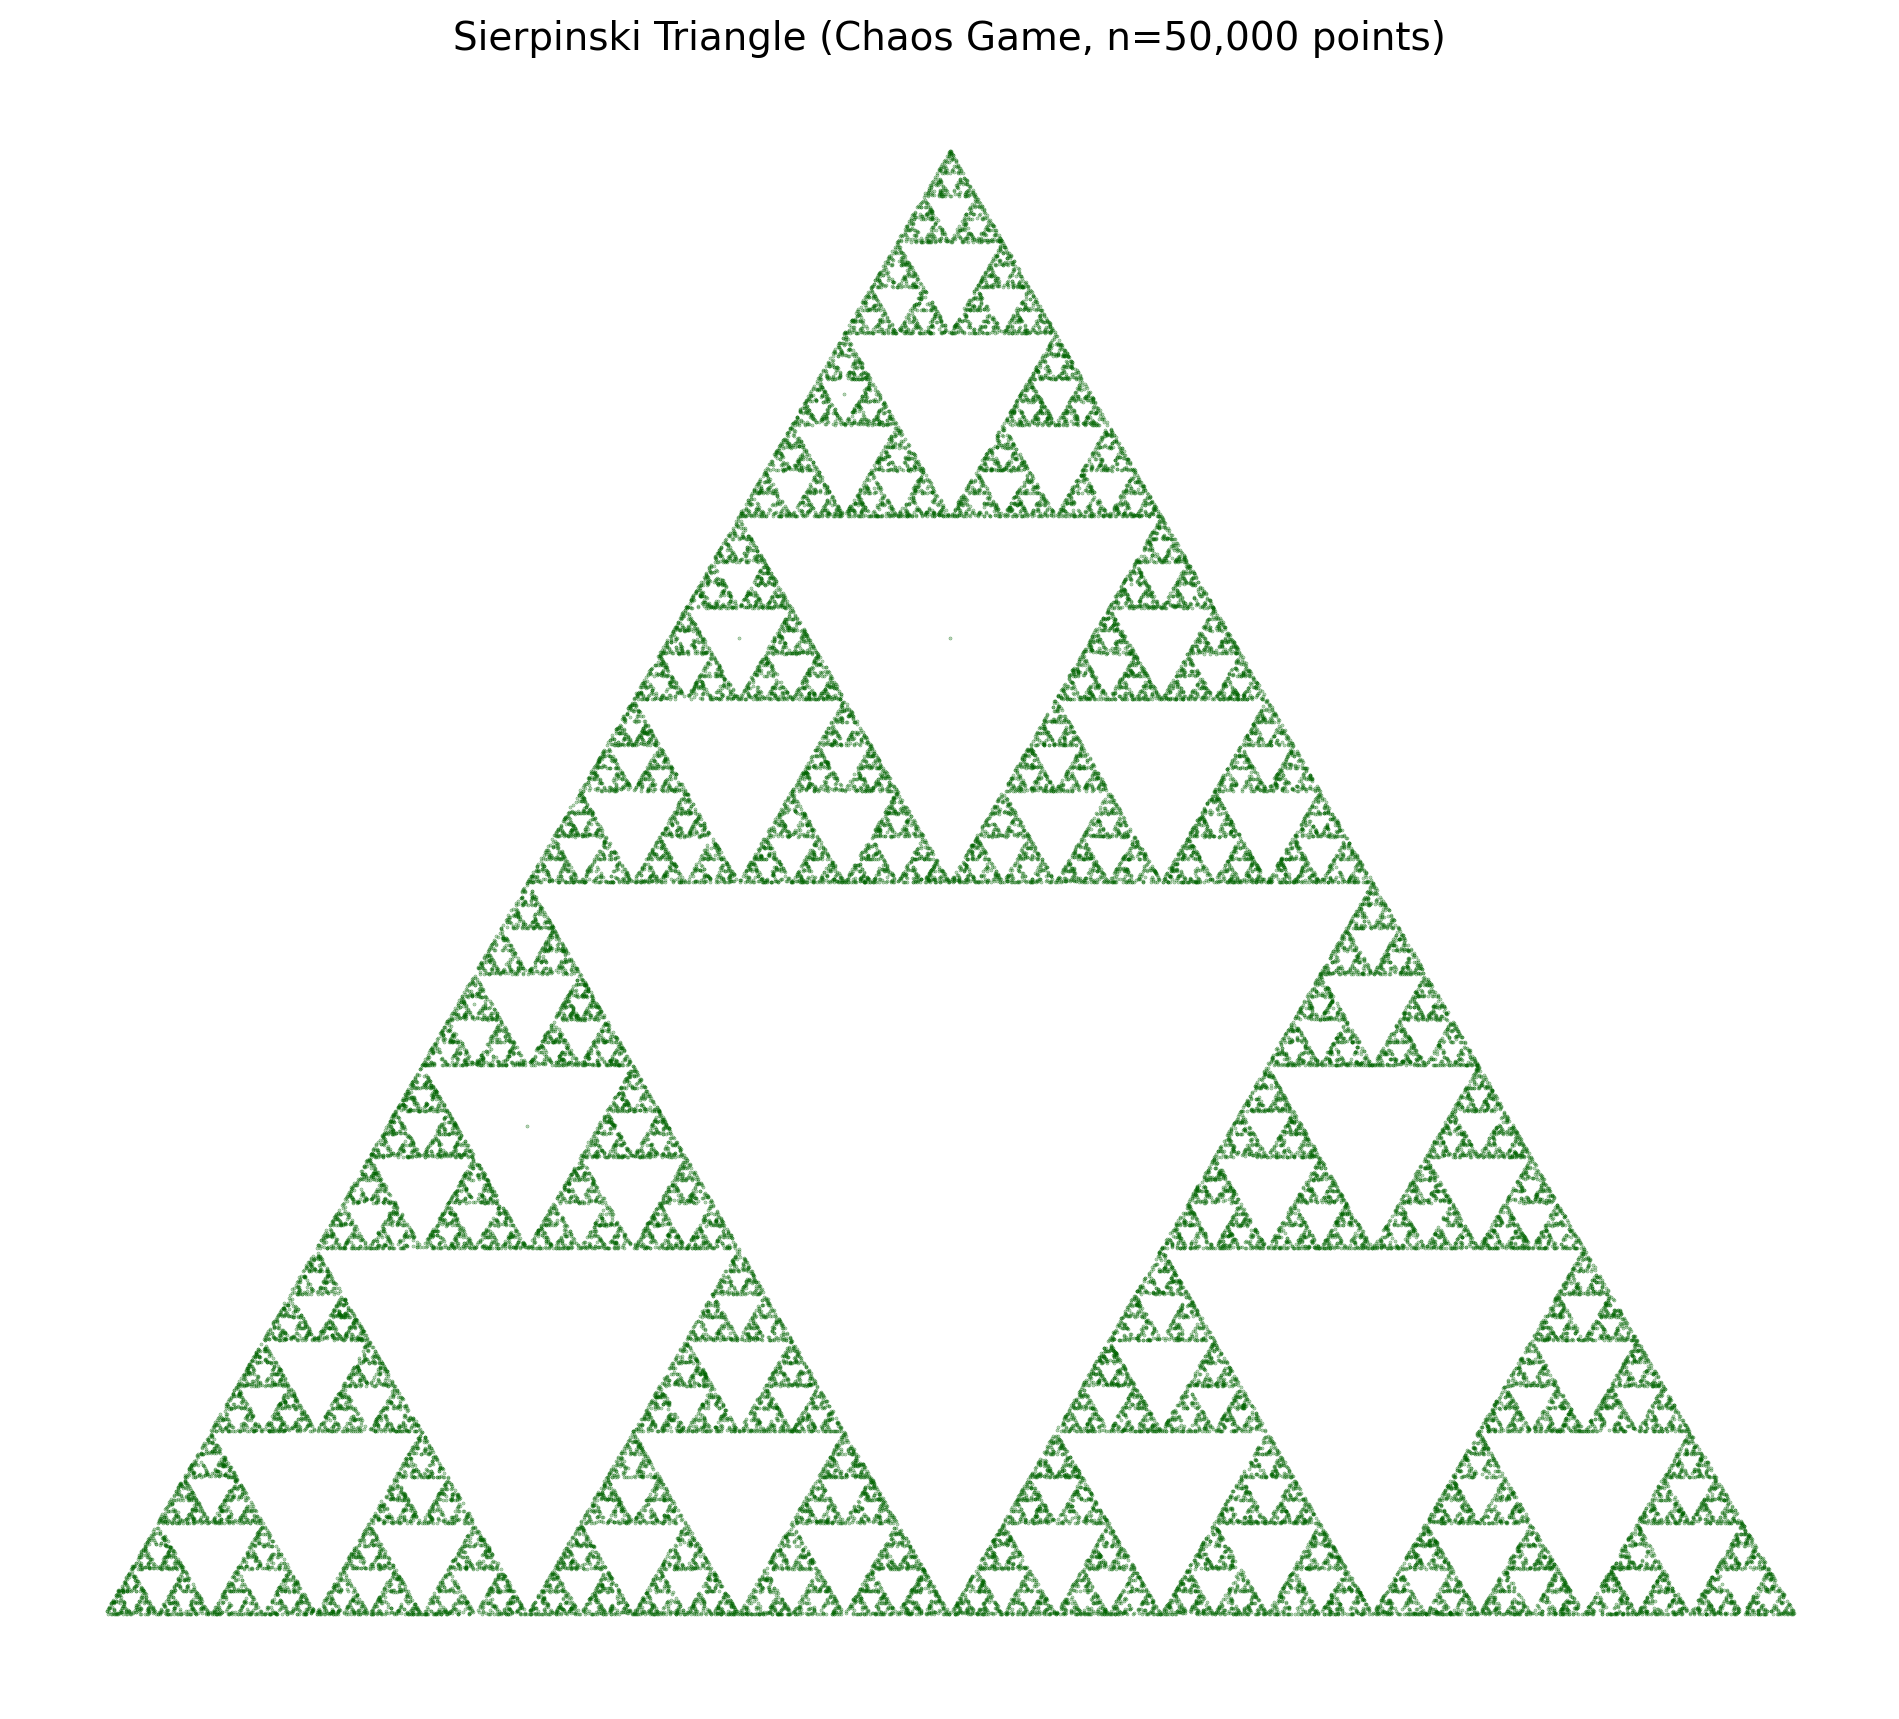

In [5]:
def plot_chaos_game(n_points=50000):
    """
    Plot Sierpinski triangle generated via Chaos Game.
    
    Parameters:
    -----------
    n_points : int
        Number of points to plot
    """
    # Generate points
    points = chaos_game_sierpinski(n_points)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(10, 8.7))
    
    # Plot points
    ax.scatter(points[:, 0], points[:, 1], s=0.1, c='darkgreen', alpha=0.5)
    
    # Formatting
    height = np.sqrt(3) / 2
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, height + 0.05)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Sierpinski Triangle (Chaos Game, n={n_points:,} points)', fontsize=14)
    
    return fig, ax

# Generate chaos game Sierpinski triangle
fig_chaos, ax_chaos = plot_chaos_game(n_points=50000)
plt.tight_layout()
plt.show()

## Method 3: Pascal's Triangle Modulo 2

A fascinating connection exists between the Sierpinski Triangle and Pascal's Triangle. When we color the odd entries of Pascal's Triangle, we obtain a discrete approximation of the Sierpinski Triangle.

Mathematically, entry $(n, k)$ in Pascal's Triangle is $\binom{n}{k}$. The pattern emerges when we compute:

$$\binom{n}{k} \mod 2$$

In [6]:
def pascals_triangle_mod2(n_rows):
    """
    Generate Pascal's triangle modulo 2.
    
    Parameters:
    -----------
    n_rows : int
        Number of rows to generate
    
    Returns:
    --------
    grid : ndarray
        2D array with 1s for odd entries, 0s for even
    """
    # Create grid
    grid = np.zeros((n_rows, 2 * n_rows - 1), dtype=int)
    
    # First row
    grid[0, n_rows - 1] = 1
    
    # Build subsequent rows
    for i in range(1, n_rows):
        for j in range(n_rows - i, n_rows + i):
            # Pascal's rule: C(n,k) = C(n-1,k-1) + C(n-1,k)
            left = grid[i-1, j-1] if j > 0 else 0
            right = grid[i-1, j+1] if j < 2*n_rows - 2 else 0
            grid[i, j] = (left + right) % 2
    
    return grid

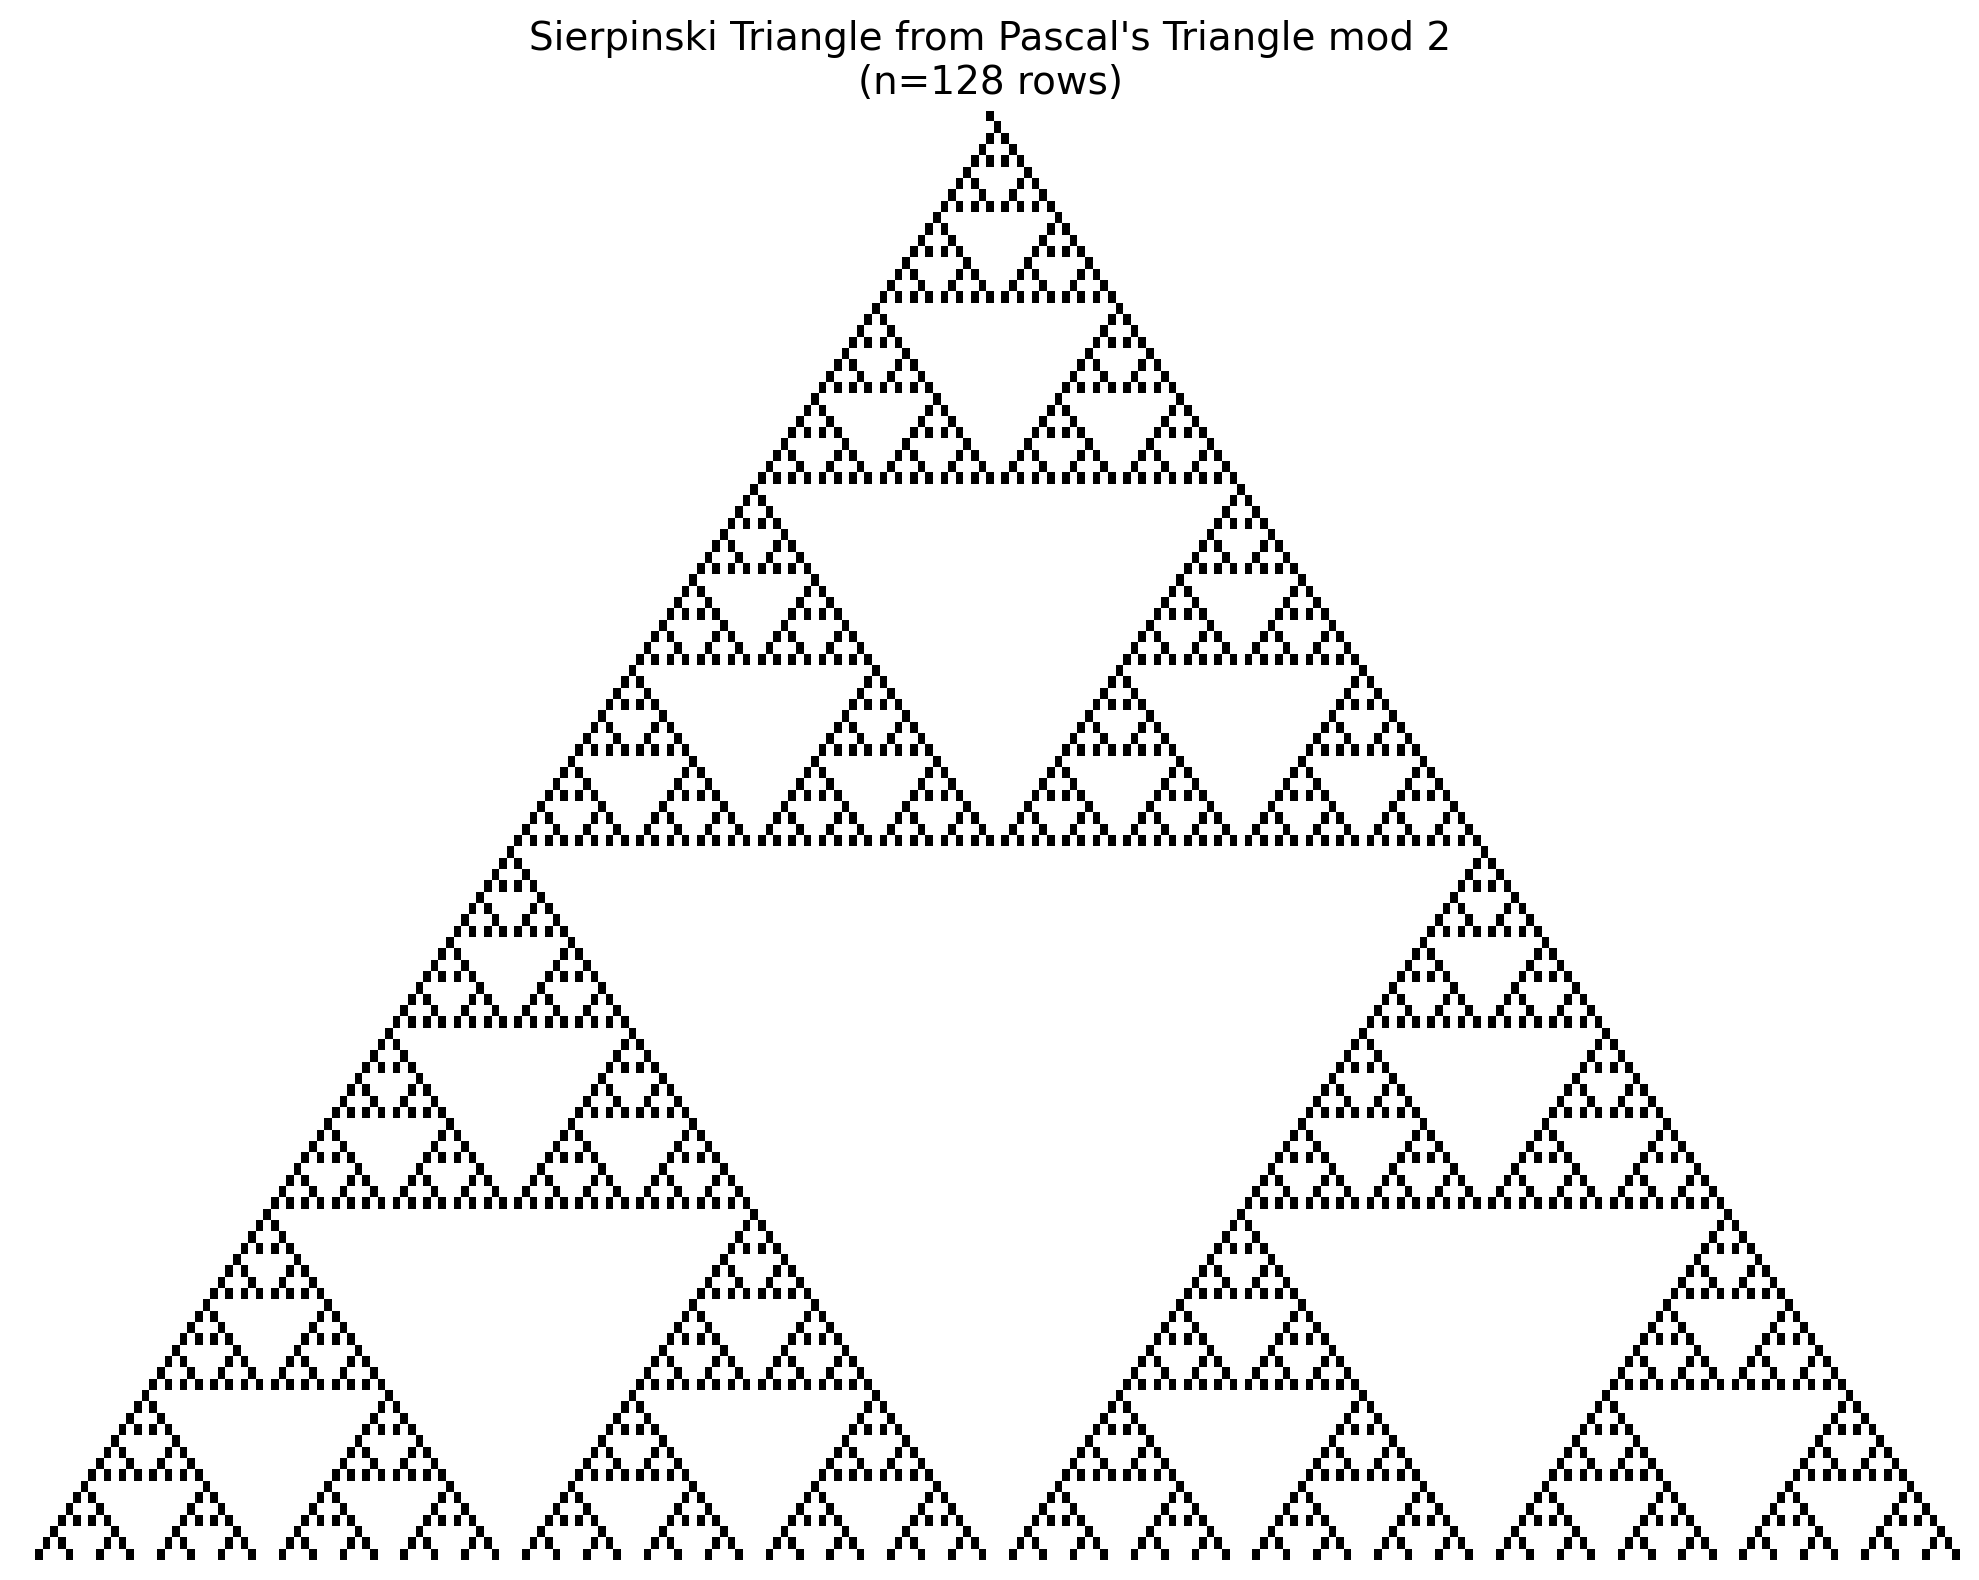

In [7]:
def plot_pascal_sierpinski(n_rows=128):
    """
    Plot Sierpinski triangle from Pascal's triangle mod 2.
    
    Parameters:
    -----------
    n_rows : int
        Number of rows in Pascal's triangle
    """
    # Generate Pascal's triangle mod 2
    grid = pascals_triangle_mod2(n_rows)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Plot as image
    ax.imshow(grid, cmap='binary', interpolation='nearest', aspect='auto')
    
    # Formatting
    ax.axis('off')
    ax.set_title(f"Sierpinski Triangle from Pascal's Triangle mod 2\n"
                 f"(n={n_rows} rows)", fontsize=14)
    
    return fig, ax

# Generate Pascal's triangle Sierpinski
fig_pascal, ax_pascal = plot_pascal_sierpinski(n_rows=128)
plt.tight_layout()
plt.show()

## Analysis: Fractal Dimension Verification

We can verify the theoretical fractal dimension $D = \log(3)/\log(2) \approx 1.585$ using the box-counting method.

In [8]:
def box_counting_dimension(points, box_sizes):
    """
    Estimate fractal dimension using box-counting method.
    
    Parameters:
    -----------
    points : ndarray
        Array of (x, y) coordinates
    box_sizes : array-like
        List of box sizes to use
    
    Returns:
    --------
    box_sizes : ndarray
    counts : ndarray
    dimension : float
    """
    counts = []
    
    for size in box_sizes:
        # Create grid of boxes
        x_bins = np.arange(0, 1 + size, size)
        y_bins = np.arange(0, 1 + size, size)
        
        # Count occupied boxes
        hist, _, _ = np.histogram2d(points[:, 0], points[:, 1], 
                                     bins=[x_bins, y_bins])
        n_boxes = np.sum(hist > 0)
        counts.append(n_boxes)
    
    # Fit log-log relationship: log(N) = -D * log(epsilon) + c
    log_sizes = np.log(box_sizes)
    log_counts = np.log(counts)
    
    # Linear regression
    coeffs = np.polyfit(log_sizes, log_counts, 1)
    dimension = -coeffs[0]
    
    return np.array(box_sizes), np.array(counts), dimension

In [9]:
# Generate points for dimension analysis
points = chaos_game_sierpinski(100000)

# Define box sizes (powers of 2 for clean scaling)
box_sizes = [1/2**k for k in range(2, 9)]

# Calculate box-counting dimension
sizes, counts, dimension = box_counting_dimension(points, box_sizes)

# Theoretical dimension
theoretical_D = np.log(3) / np.log(2)

print(f"Estimated fractal dimension: D = {dimension:.4f}")
print(f"Theoretical fractal dimension: D = {theoretical_D:.4f}")
print(f"Relative error: {abs(dimension - theoretical_D) / theoretical_D * 100:.2f}%")

Estimated fractal dimension: D = 1.6034
Theoretical fractal dimension: D = 1.5850
Relative error: 1.16%


## Final Visualization: Comparison of Methods

We create a comprehensive figure comparing all three construction methods.

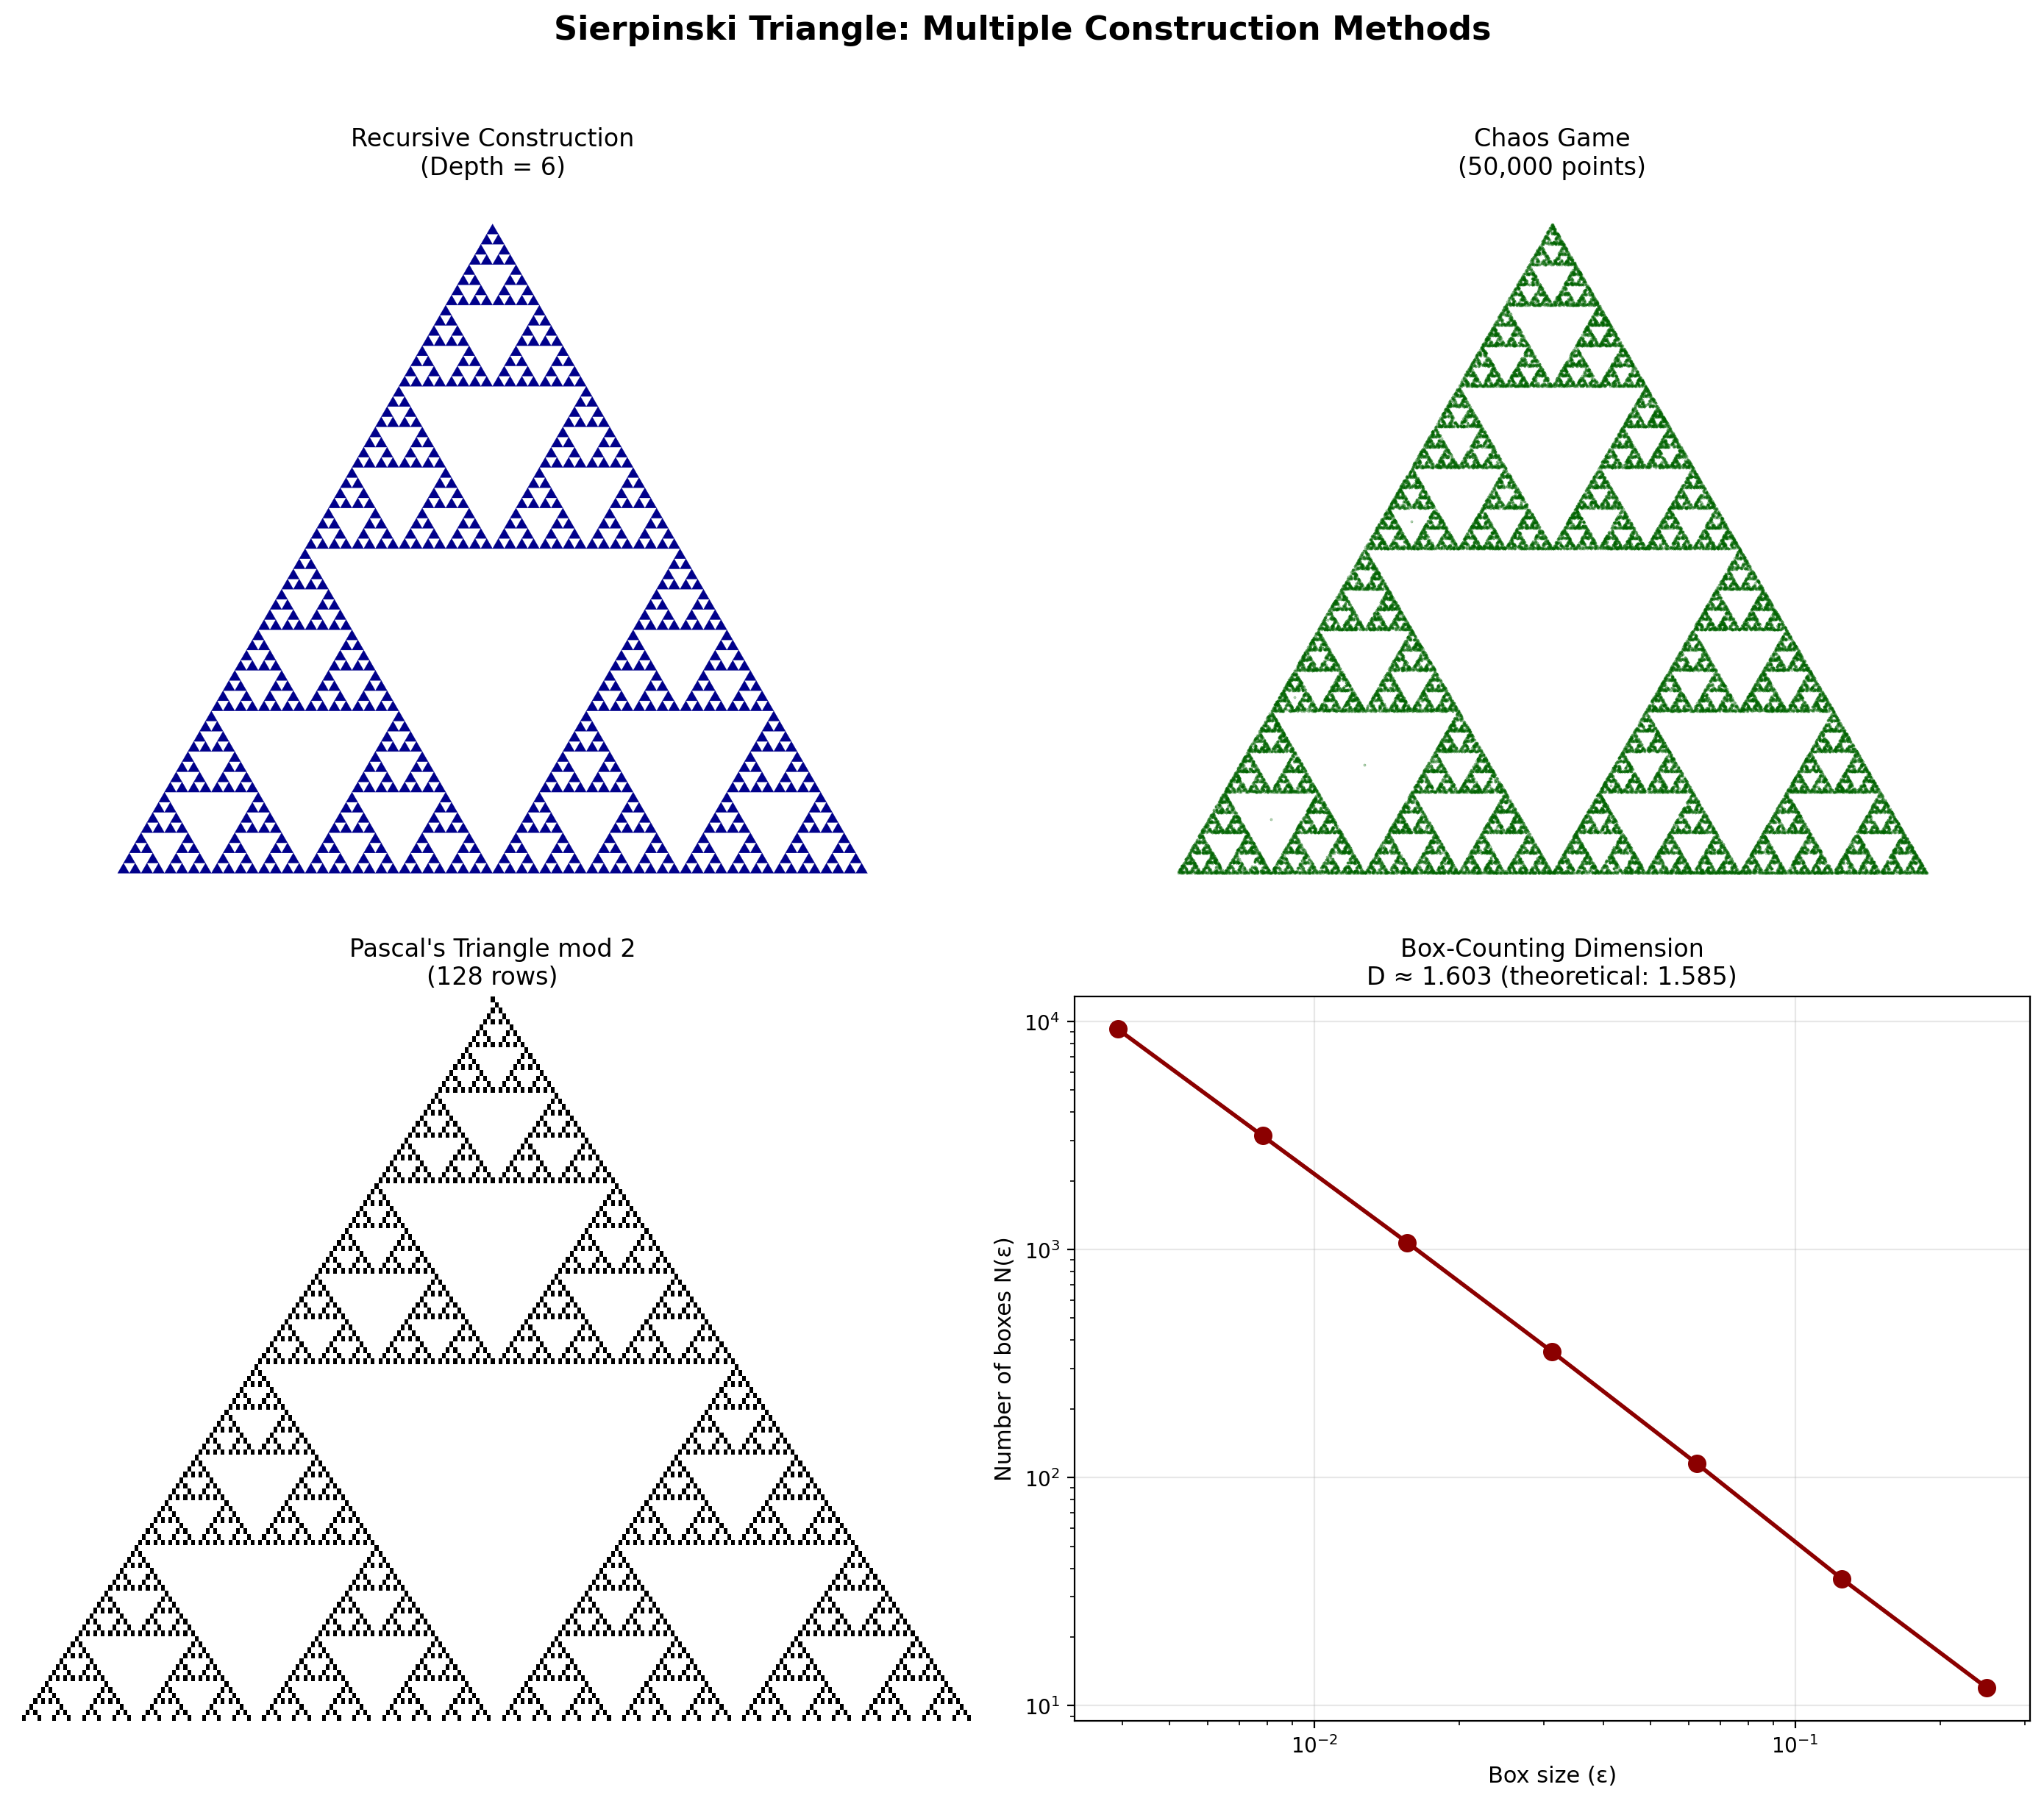


Figure saved to 'plot.png'


In [10]:
# Create comprehensive comparison figure
fig = plt.figure(figsize=(14, 12))

# Method 1: Recursive construction
ax1 = fig.add_subplot(2, 2, 1)
height = np.sqrt(3) / 2
initial_vertices = np.array([[0, 0], [1, 0], [0.5, height]])
triangles = sierpinski_recursive(initial_vertices, 6)
patches = [Polygon(tri, closed=True) for tri in triangles]
collection = PatchCollection(patches, facecolor='darkblue', 
                              edgecolor='darkblue', linewidth=0.1)
ax1.add_collection(collection)
ax1.set_xlim(-0.05, 1.05)
ax1.set_ylim(-0.05, height + 0.05)
ax1.set_aspect('equal')
ax1.axis('off')
ax1.set_title('Recursive Construction\n(Depth = 6)', fontsize=12)

# Method 2: Chaos Game
ax2 = fig.add_subplot(2, 2, 2)
chaos_points = chaos_game_sierpinski(50000)
ax2.scatter(chaos_points[:, 0], chaos_points[:, 1], s=0.1, c='darkgreen', alpha=0.5)
ax2.set_xlim(-0.05, 1.05)
ax2.set_ylim(-0.05, height + 0.05)
ax2.set_aspect('equal')
ax2.axis('off')
ax2.set_title('Chaos Game\n(50,000 points)', fontsize=12)

# Method 3: Pascal's Triangle mod 2
ax3 = fig.add_subplot(2, 2, 3)
grid = pascals_triangle_mod2(128)
ax3.imshow(grid, cmap='binary', interpolation='nearest', aspect='auto')
ax3.axis('off')
ax3.set_title("Pascal's Triangle mod 2\n(128 rows)", fontsize=12)

# Box-counting analysis
ax4 = fig.add_subplot(2, 2, 4)
ax4.loglog(sizes, counts, 'o-', color='darkred', markersize=8, linewidth=2)
ax4.set_xlabel('Box size (ε)', fontsize=11)
ax4.set_ylabel('Number of boxes N(ε)', fontsize=11)
ax4.set_title(f'Box-Counting Dimension\nD ≈ {dimension:.3f} '
              f'(theoretical: {theoretical_D:.3f})', fontsize=12)
ax4.grid(True, alpha=0.3)

# Add overall title
fig.suptitle('Sierpinski Triangle: Multiple Construction Methods', 
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('sierpinski_triangle_fractal_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved to 'plot.png'")

## Conclusions

This notebook demonstrated three distinct methods for constructing the Sierpinski Triangle:

1. **Recursive Geometric Method**: Direct implementation of the mathematical definition through recursive subdivision.

2. **Chaos Game**: A probabilistic approach that generates the fractal through iterated random selection, demonstrating emergent order from apparent chaos.

3. **Pascal's Triangle Mod 2**: Reveals the deep connection between combinatorics and fractal geometry.

The box-counting analysis confirms the theoretical fractal dimension $D = \log(3)/\log(2) \approx 1.585$, situating the Sierpinski Triangle between a one-dimensional line and a two-dimensional plane.

### Key Takeaways

- The Sierpinski Triangle has **zero area** but **infinite perimeter**
- Its fractal dimension of $\approx 1.585$ quantifies its "roughness"
- Multiple independent construction methods converge to the same structure, demonstrating the fundamental nature of this fractal
- The Chaos Game illustrates how simple rules can generate complex, self-similar patterns